In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'


In [4]:
file = pd.read_csv(path)
print(file.head())

   Unnamed: 0.1  Unnamed: 0 loan_status  Principal  terms effective_date  \
0             0           0     PAIDOFF       1000     30       9/8/2016   
1             2           2     PAIDOFF       1000     30       9/8/2016   
2             3           3     PAIDOFF       1000     15       9/8/2016   
3             4           4     PAIDOFF       1000     30       9/9/2016   
4             6           6     PAIDOFF       1000     30       9/9/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male  
3  10/8/2016   28               college  female  
4  10/8/2016   29               college    male  


In [5]:
file['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [6]:
!pip install seaborn
import seaborn as sns


In [7]:
file.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [8]:
file['due_date'] = pd.to_datetime(file['due_date'])
file['effective_date'] = pd.to_datetime(file['effective_date'])
file.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [9]:
file['Principal'].value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

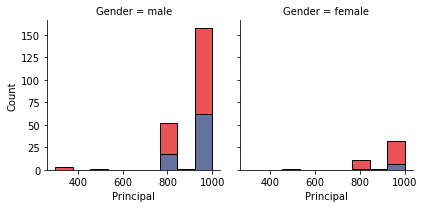

In [10]:
bins= np.linspace(file['Principal'].min(), file['Principal'].max(), 10)
g = sns.FacetGrid(data= file, col= 'Gender', hue= 'loan_status',palette='Set1',col_wrap= 2)
g.map(sns.histplot, 'Principal', bins=bins, ec= 'k')
plt.show()
g.axes[-1].legend()


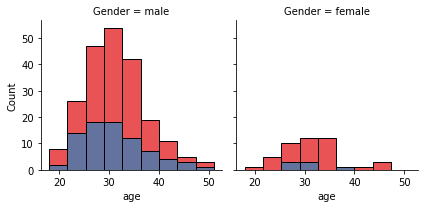

In [11]:
bins= np.linspace(file.age.min(), file.age.max(), 10)
g= sns.FacetGrid(data=file, col='Gender', hue='loan_status', palette='Set1', col_wrap=2, legend_out= True)
g.map(sns.histplot, 'age', bins=bins)
plt.show()


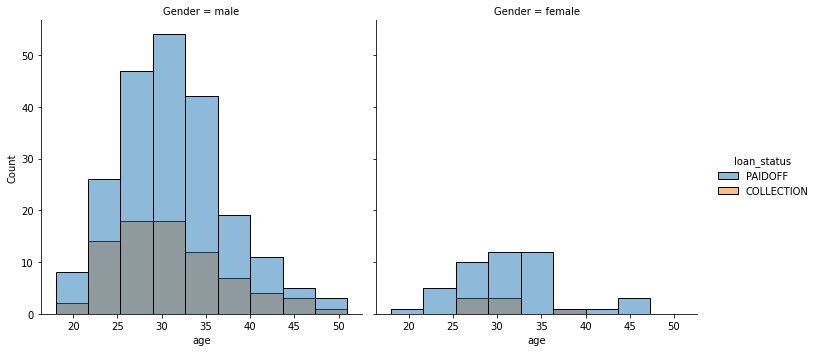

In [12]:
sns.displot(data=file,x='age',bins=bins,col='Gender', hue='loan_status')

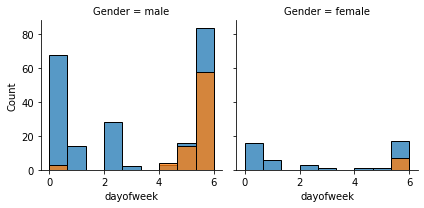

In [13]:
file['dayofweek']= file['effective_date'].dt.dayofweek
bins = np.linspace(file.dayofweek.min(), file.dayofweek.max(), 10)
g = sns.FacetGrid(data= file, col= 'Gender', hue='loan_status')
g.map(sns.histplot, 'dayofweek', bins=bins)

In [14]:
file['weekend'] = file['dayofweek'].apply(lambda x: 1 if (x > 3) else 0)
file.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [15]:
file['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
file.head()


,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [16]:
file.groupby(['education'])['loan_status'].value_counts(normalize=True)
feature = file[['Principal','terms','age','Gender','weekend']]
feature = pd.concat([feature, pd.get_dummies(file['education'])], axis=1)
feature.drop(['Master or Above'], axis = 1,inplace=True)

feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [31]:

y = file['loan_status'].values
y[0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [32]:
X = preprocessing.StandardScaler().fit(feature).transform(feature)
X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

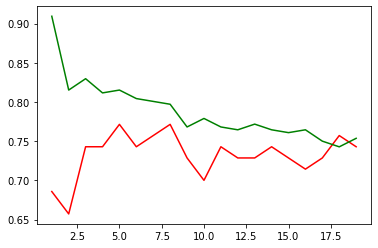

In [34]:
test_scores= {}
train_scores= {}
neighbors= np.arange(1,20)
for neighbor in neighbors:
    k_model= KNeighborsClassifier(n_neighbors=neighbor)
    k_model.fit(X_train, y_train)
    accuracystest = k_model.score(X_test, y_test)
    accuracystrain = k_model.score(X_train, y_train)
    test_scores[neighbor]= accuracystest
    train_scores[neighbor] =accuracystrain
##print('test_scores {}, train_scores {}'.format(test_scores, train_scores))
test_list = list(test_scores.values())
train_list = list(train_scores.values())
plt.plot( neighbors, test_list, color= 'r')
plt.plot( neighbors, train_list, color= 'g')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 4, stratify=y)
kmodel = KNeighborsClassifier().fit(X_train, y_train)

In [36]:
kmodel.predict(X_test)

array(['COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [37]:
from sklearn.tree import DecisionTreeClassifier

#Modelling
modeltree = DecisionTreeClassifier(criterion="entropy")
modeltree.fit(X_train, y_train)

#Prediction
predTree = modeltree.predict(X_test)
print(predTree[0:5])
print(y_test[0:5])

names = feature.columns

['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


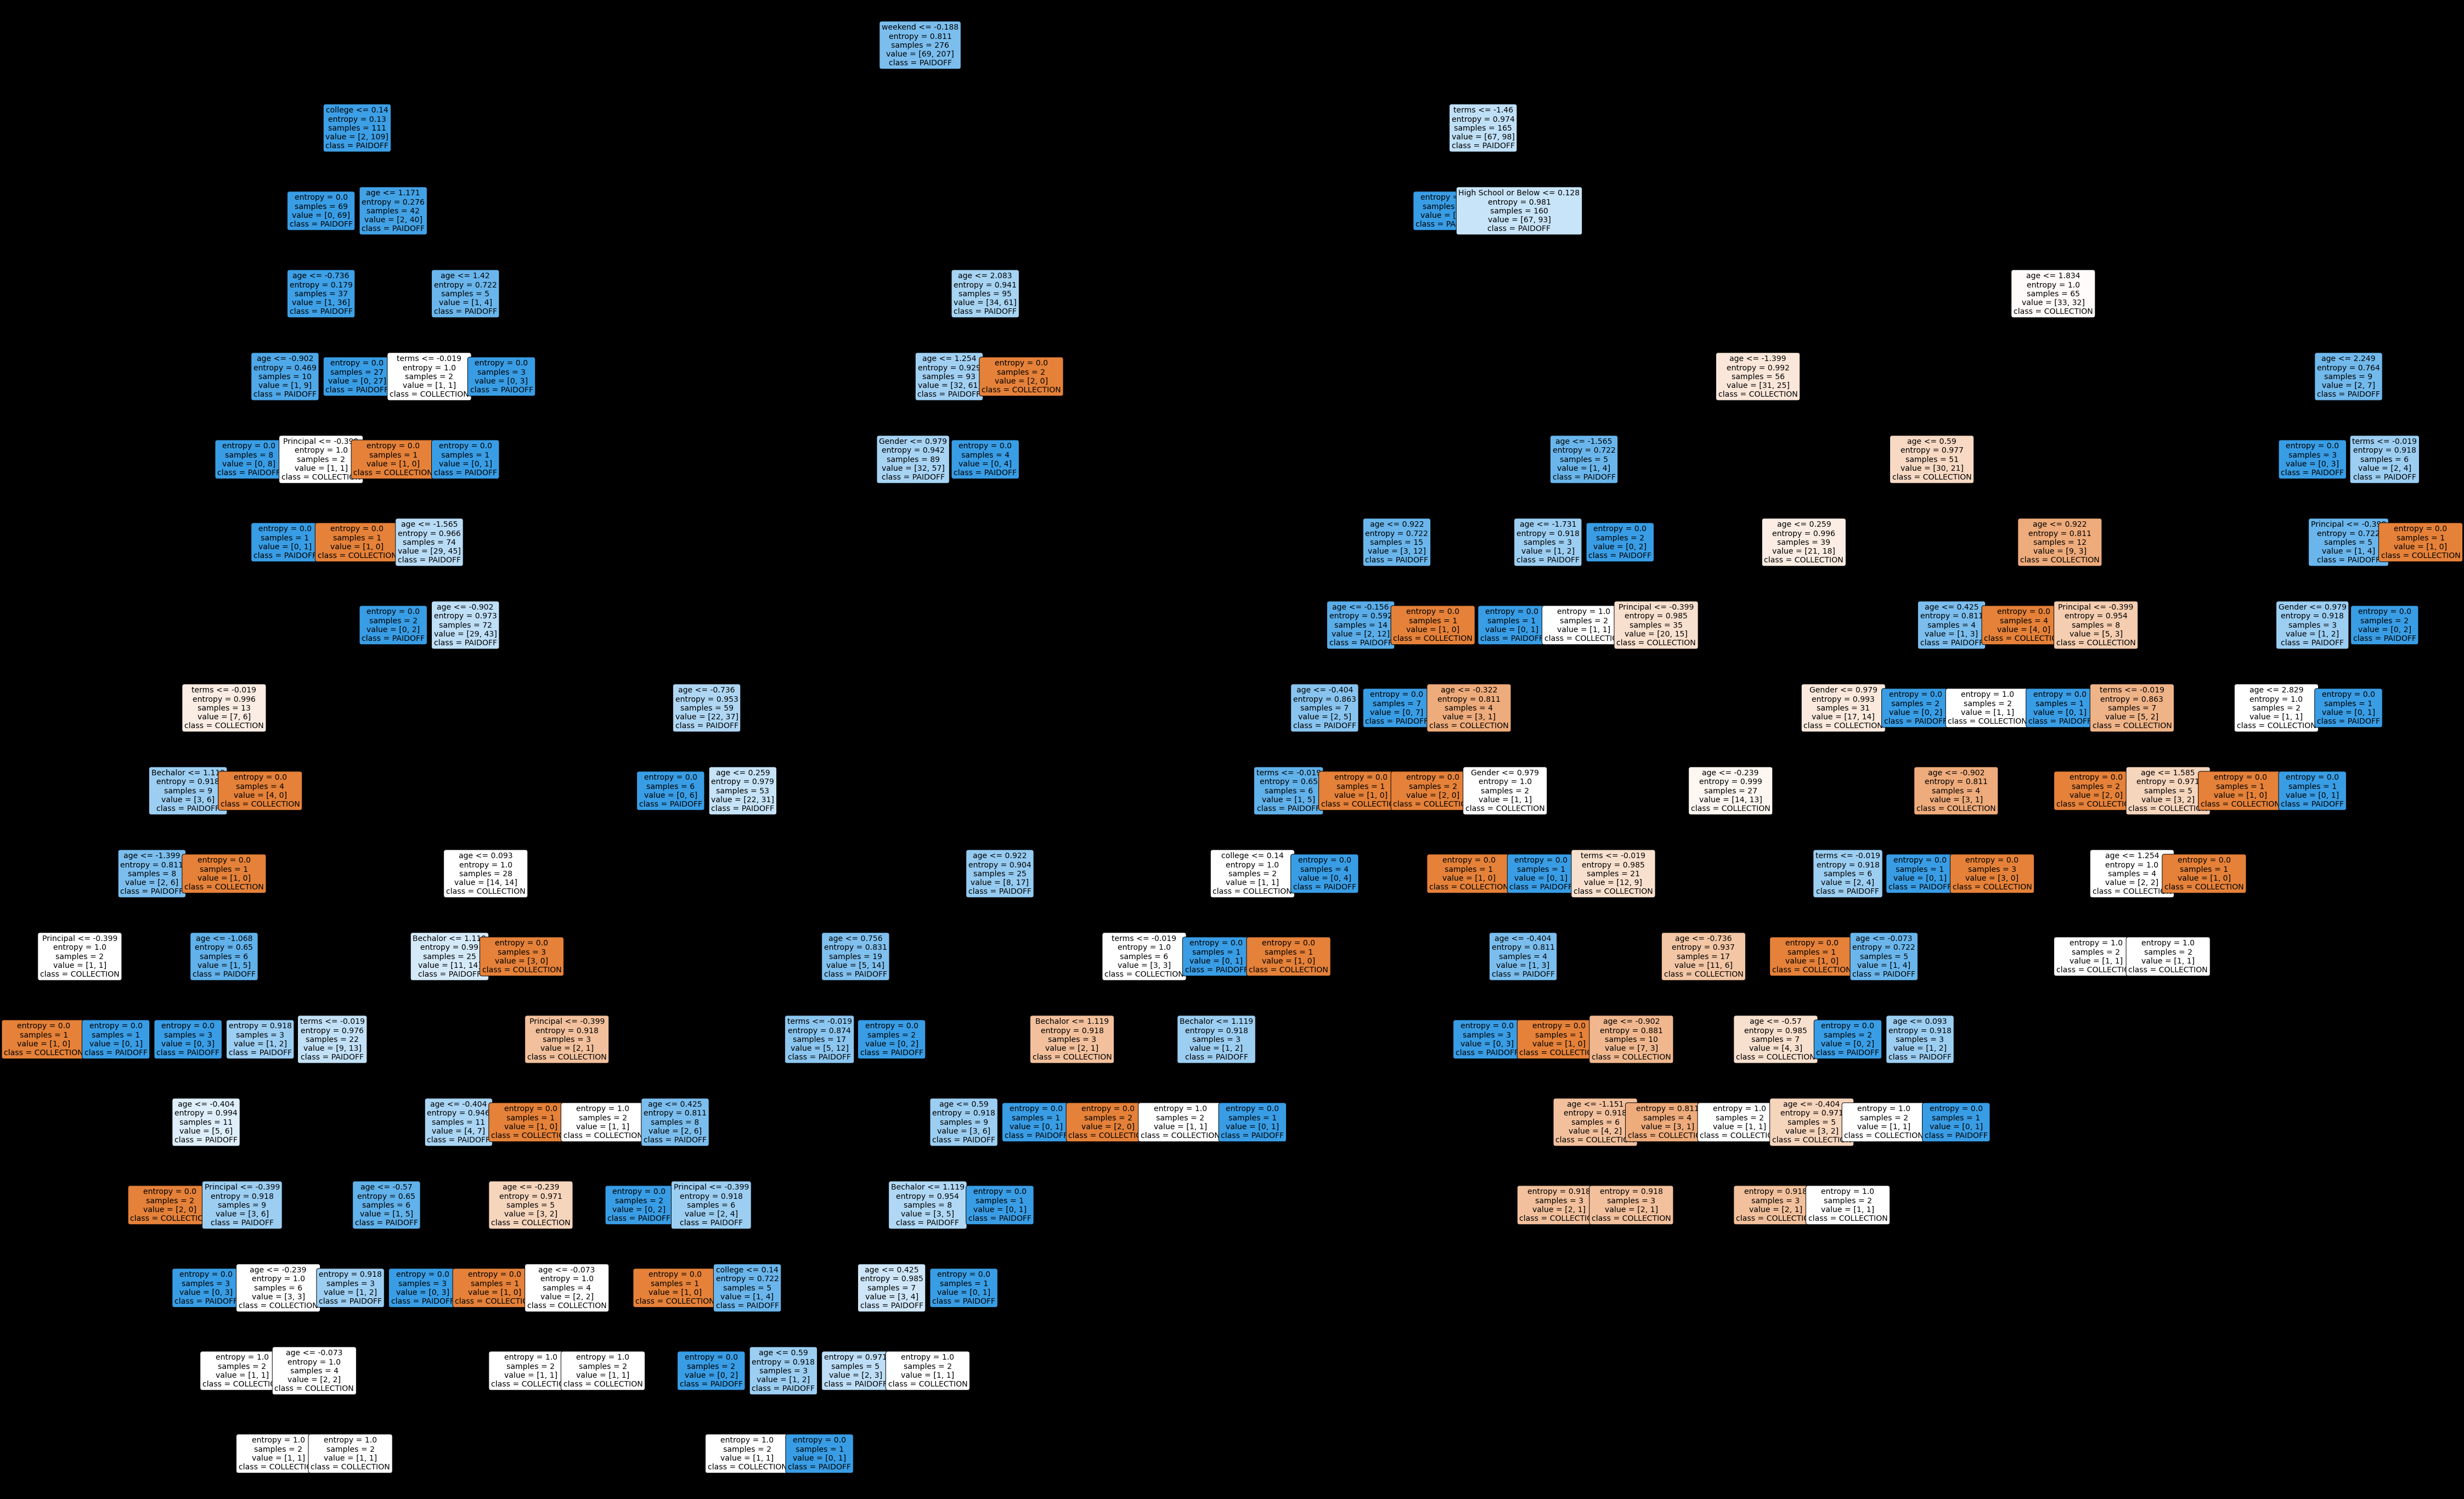

In [47]:
from sklearn import tree
plt.figure(figsize=(80,50), facecolor ='k')
a = tree.plot_tree(modeltree,
                   feature_names = names,
                   class_names = ['COLLECTION', 'PAIDOFF'],
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()



In [48]:
from sklearn import preprocessing
from sklearn import svm

#Modelling
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [49]:
yhat = clf.predict(X_test)

In [50]:
#Evaluation
from sklearn.metrics import f1_score
f1_score(y_test,yhat, average="weighted")

0.6382526564344746

In [51]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)

In [55]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.50097561, 0.49902439],
       [0.50107892, 0.49892108],
       [0.28310172, 0.71689828],
       [0.28301786, 0.71698214],
       [0.28394114, 0.71605886]])